# Desafío Técnico:

A partir de los datos extraidos de una aplicación para la comercializacion de productos, se busca intentar predecir qué productos comprará el cliente. De este modose busca mejorar la experiencia de usuario. En este notebook se realiza un analisis exploratorio de datos y se lleva a cabo un algoritmo diseñado para encontrar los productos que el cliente desea comprar.

**El notebook consta de 5 partes:**

[1. Primer análisis de los datos](#1-Primer-análisis-de-los-datos:): - Se realiza una exploración inicial de los dataframes para comprender su estructura y contenido .

[2. Gráficos](#2-Gráficos:): - Se presentan visualizaciones que muestran la distribución y patrones de las caracteristicas, proporcionando información que será utilizada para realizar el modelo.

[3. Realización del modelo](#3-Realización-del-modelo:): - En esta sección, se lleva a cabo la preparación de los datos, que incluye la transformación de variables, el encoding de categorías, la reducción de dimensionalidad y la implementación del modelo de clustering.

[4. Dataframe final (output)](##-4-Dataframe-final-(output):): - Se presenta el dataframe final que ofrece una lista de 10 SKU recomendados para cada cliente, basada en los resultados del modelo.

[5. Para mejorar](##-5-Para-mejorar:): - Se proporcionan sugerencias y comentarios sobre posibles áreas de mejora o aspectos a considerar para futuras iteraciones del algoritmo.






In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1 Primer análisis de los datos:

In [16]:
transacciones = pd.read_csv('transacciones.csv')
transacciones.sample(10)

,Unnamed: 0,ACCOUNT_ID,SKU_ID,INVOICE_DATE,ORDER_ID,ITEMS_PHYS_CASES
94408,94408,458625,77855,20220719,512-3828673-0,1.0
3913,3913,316658,7026,20220609,512-3668492-0,8.0
219168,219168,426342,7038,20220802,512-3895805-0,1.0
24266,24266,186462,7475,20220616,512-3705045-0,2.0
113937,113937,440478,25979,20220804,512-3906219-0,1.0
24395,24395,458664,19399,20220817,512-3961584-0,2.0
98973,98973,447478,23902,20220708,512-3787888-0,2.0
227800,227800,448402,24994,20220830,512-4027596-0,1.0
268147,268147,316658,11522,20220804,512-3907230-0,2.0
35960,35960,422224,24932,20220715,512-3812447-0,2.0


In [17]:
#dropeo la columna 'Unnamed:0' porque pareciera que solo tiene los índices
transacciones.drop(columns=['Unnamed: 0'], inplace=True)
transacciones.sample(10)

,ACCOUNT_ID,SKU_ID,INVOICE_DATE,ORDER_ID,ITEMS_PHYS_CASES
254912,123191,1416,20220827,512-4016684-0,1.0
240686,440562,16666,20220809,512-3931425-0,1.0
19063,435368,7038,20220817,512-3964776-0,3.0
253412,425336,7475,20220712,512-3800273-0,1.0
64140,336438,21972,20220819,512-3978729-0,1.0
158009,438156,18354,20220825,102-39304743-0,2.0
149722,419425,2201,20220830,512-4027032-0,4.0
184585,392405,19088,20220801,512-3890343-0,1.0
37514,329168,19088,20220802,512-3894335-0,2.0
117194,430799,12165,20220712,512-3798803-0,2.0


In [18]:
transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280828 entries, 0 to 280827
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ACCOUNT_ID        280828 non-null  int64  
 1   SKU_ID            280828 non-null  int64  
 2   INVOICE_DATE      280828 non-null  int64  
 3   ORDER_ID          280828 non-null  object 
 4   ITEMS_PHYS_CASES  280828 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 10.7+ MB


In [19]:
transacciones.nunique()

ACCOUNT_ID           4535
SKU_ID                530
INVOICE_DATE           77
ORDER_ID            45547
ITEMS_PHYS_CASES      237
dtype: int64

In [20]:
transacciones['INVOICE_DATE'] = pd.to_datetime(transacciones['INVOICE_DATE'], format='%Y%m%d')
transacciones

,ACCOUNT_ID,SKU_ID,INVOICE_DATE,ORDER_ID,ITEMS_PHYS_CASES
0,430606,7038,2022-07-29,512-3880249-0,100.0
1,323267,14933,2022-07-29,512-3882307-0,1.0
2,357825,21971,2022-07-23,512-3852880-0,8.0
3,444926,7038,2022-08-05,512-3913163-0,20.0
4,450771,7030,2022-08-16,512-3957000-0,5.0
...,...,...,...,...,...
280823,451087,77831,2022-08-18,512-3970160-0,1.0
280824,432702,24075,2022-07-08,512-3789440-0,1.0
280825,446867,77856,2022-08-05,512-3916949-0,1.0
280826,456645,22319,2022-06-09,512-3673728-0,1.0


In [21]:
print('Fecha min: ', transacciones.INVOICE_DATE.min())
print('Fecha Max: ', transacciones.INVOICE_DATE.max())

Fecha min:  2022-05-24 00:00:00
Fecha Max:  2022-08-31 00:00:00


Transformar a entero los números de ITEMS_PHYS_CASES

In [22]:
#Cuántos registros no son enteros?
transacciones.loc[transacciones['ITEMS_PHYS_CASES'] % 1 != 0].shape[0]

6

In [23]:
transacciones.loc[transacciones['ITEMS_PHYS_CASES'] % 1 != 0]

,ACCOUNT_ID,SKU_ID,INVOICE_DATE,ORDER_ID,ITEMS_PHYS_CASES
41,415838,25641,2022-07-19,512-3829354-0,0.166667
45,436158,2439,2022-08-27,512-4014453-0,0.166667
105,359572,7026,2022-07-22,101-21885822-0,0.083333
114805,378369,7026,2022-07-22,101-21885824-0,0.083333
127689,450761,7038,2022-06-24,101-21810741-0,0.083333
152833,448025,77698,2022-07-05,512-3766420-0,0.083333


De la columna ITEMS_PHYS_CASES solo hay 6 casos en donde no hay números enteros. De todos modos, el numero 0.16.. corresponde al 1/6 y el 0.083.. corresponde al 1/12. (como si hubieran comprado una lata de un pack de 6...)

In [24]:
transacciones.ITEMS_PHYS_CASES = transacciones.ITEMS_PHYS_CASES.astype(int)
transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280828 entries, 0 to 280827
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ACCOUNT_ID        280828 non-null  int64         
 1   SKU_ID            280828 non-null  int64         
 2   INVOICE_DATE      280828 non-null  datetime64[ns]
 3   ORDER_ID          280828 non-null  object        
 4   ITEMS_PHYS_CASES  280828 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 9.6+ MB


In [25]:
atributos = pd.read_csv('atributos.csv')
atributos.sample(10)

,Unnamed: 0,POC,BussinessSegment,totalVolumen,SkuDistintosPromediosXOrden,SkuDistintosToTales,concentracion,nse,segmentoUnico,canal
2974,22997,370574,MediumUsage,6.62880,4.1429,12,Medio,Medio,1.Inactivos,Tradicional
3861,29490,435776,PowerUsage,5.41264,4.5714,41,Medio,Medio,5.Select,Tradicional
2317,17742,444459,PowerUsage,51.46384,4.9500,48,Alto,Medio,5.Select,Tradicional
1662,12867,438162,HighUsage,5.26844,5.5556,39,Medio,Bajo,4.Activos,Autoservicio
4207,31977,460533,MinimalUsage,0.98124,1.5000,6,S/D,S/D,1.Inactivos,Tradicional
611,4503,382055,HighUsage,7.26272,1.9250,19,Medio,Bajo,2.Masivos,Tradicional
1436,11125,392783,MinimalUsage,2.91264,6.8333,17,Alto,Medio,2.Masivos,COMIDA
1934,15097,456194,MediumUsage,6.62544,9.0000,36,Alto,S/D,4.Activos,Tradicional
907,6917,452984,MinimalUsage,6.60066,9.0000,18,Alto,S/D,2.Masivos,Tradicional
2864,22023,399624,HighUsage,12.68812,5.6111,44,Medio,Medio,5.Select,Tradicional


In [26]:
atributos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   4400 non-null   int64  
 1   POC                          4400 non-null   int64  
 2   BussinessSegment             4400 non-null   object 
 3   totalVolumen                 4400 non-null   float64
 4   SkuDistintosPromediosXOrden  4400 non-null   float64
 5   SkuDistintosToTales          4400 non-null   int64  
 6   concentracion                4400 non-null   object 
 7   nse                          4400 non-null   object 
 8   segmentoUnico                4325 non-null   object 
 9   canal                        4386 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 343.9+ KB


In [27]:
atributos.nunique()

Unnamed: 0                     4400
POC                            4400
BussinessSegment                  4
totalVolumen                   4323
SkuDistintosPromediosXOrden    1573
SkuDistintosToTales             124
concentracion                     4
nse                               4
segmentoUnico                     5
canal                            11
dtype: int64

In [28]:
atributos.BussinessSegment.unique()

array(['HighUsage', 'PowerUsage', 'MinimalUsage', 'MediumUsage'],
      dtype=object)

In [29]:
atributos.concentracion.unique()

array(['Medio', 'Alto', 'Bajo', 'S/D'], dtype=object)

In [30]:
atributos.nse.unique()

array(['Bajo', 'Medio', 'S/D', 'Alto'], dtype=object)

In [31]:
atributos.segmentoUnico.unique()

array(['4.Activos', '5.Select', '1.Inactivos', '2.Masivos',
       '3.Potenciales', nan], dtype=object)

In [32]:
atributos.canal.unique()

array(['Kioscos/Maxikioscos', 'Tradicional', 'COMIDA', 'Autoservicio',
       'BEBIDA', 'Mayorista', 'OTROS REF', nan, 'Bar/Restaurant',
       'Instituciones', 'ENTRETENIMIENTO', 'KA Minoristas'], dtype=object)

In [33]:
atributos.describe()

,Unnamed: 0,POC,totalVolumen,SkuDistintosPromediosXOrden,SkuDistintosToTales
count,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000
mean,16891.122273,369986.901591,22.272537,5.911031,27.832727
std,9677.176234,120783.016751,106.642437,3.227491,21.640289
min,10.000000,22204.000000,0.021240,0.702700,1.000000
25%,8557.500000,359970.000000,2.119175,3.666700,12.000000
50%,16935.500000,421129.500000,5.599390,5.142900,22.000000
75%,25341.500000,444938.250000,13.955585,7.354925,38.000000
max,33432.000000,677317.000000,4274.444160,33.000000,157.000000


In [34]:
atributos.loc[atributos['segmentoUnico'].isna()].sample(30)


,Unnamed: 0,POC,BussinessSegment,totalVolumen,SkuDistintosPromediosXOrden,SkuDistintosToTales,concentracion,nse,segmentoUnico,canal
1377,10663,437611,MinimalUsage,0.38880,5.0000,5,Medio,Medio,NaN,NaN
2280,17540,427293,MediumUsage,189.14736,3.9394,34,S/D,S/D,NaN,KA Minoristas
3013,23268,453329,HighUsage,0.74424,3.0000,6,Alto,S/D,NaN,KA Minoristas
89,751,453992,MinimalUsage,2.58144,21.0000,21,Medio,S/D,NaN,NaN
1025,7980,456988,MediumUsage,0.27000,4.0000,4,S/D,S/D,NaN,Instituciones
4216,32022,367027,MinimalUsage,0.29940,5.0000,5,Alto,Medio,NaN,NaN
3561,27209,444151,HighUsage,8.14852,5.6000,17,Bajo,Medio,NaN,Instituciones
274,2216,426542,MinimalUsage,25.92000,5.2857,15,Alto,Medio,NaN,Instituciones
2072,16097,440915,MinimalUsage,0.29052,3.0000,3,Alto,Medio,NaN,Instituciones
2847,21877,412038,HighUsage,6.09800,6.1000,20,Medio,Medio,NaN,Instituciones


La columna 'Unanamed: 0' pareciera ser una columna que contenía indices y quedó al exportar del dataframe original al csv. La elimino.

In [35]:
atributos.drop(columns=['Unnamed: 0'], inplace=True)


## 2 Gráficos:

Volumen Total Promedio por Segmento de Negocio

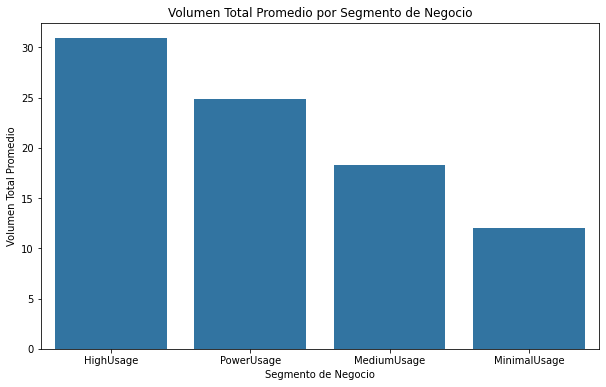

In [36]:


uso_app_volumen_compra = atributos[['BussinessSegment', 'totalVolumen']].groupby(['BussinessSegment']).mean().reset_index().sort_values(by='totalVolumen', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='BussinessSegment', y='totalVolumen', data=uso_app_volumen_compra)
plt.xlabel('Segmento de Negocio')
plt.ylabel('Volumen Total Promedio')
plt.title('Volumen Total Promedio por Segmento de Negocio')
plt.show()

Uso de la app por clientes:

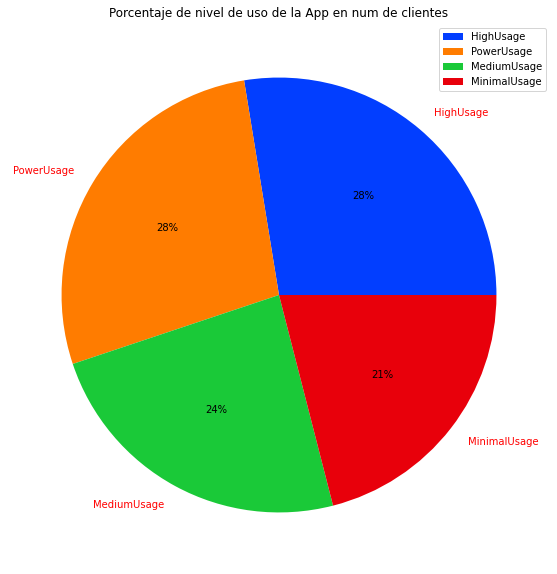

In [37]:
n_clientes_por_uso_app = atributos['BussinessSegment'].value_counts().reset_index()
n_clientes_por_uso_app
data = n_clientes_por_uso_app['count']
labels = n_clientes_por_uso_app['BussinessSegment']
colors = sns.color_palette('bright')
plt.figure(figsize=(10, 10))
# Crear el gráfico de torta
pie = plt.pie(data, labels=labels, colors=colors, autopct='%0.0f%%')
plt.gca().set_facecolor('black')  # Establecer el fondo negro

# Cambiar el color de las etiquetas a blanco
for label in pie[1]:
    label.set_color('red')
plt.legend()
plt.title("Porcentaje de nivel de uso de la App en num de clientes")
plt.show()

Cuantos Sku distintos compran los usuarios clasificados por nivel de uso de la app?

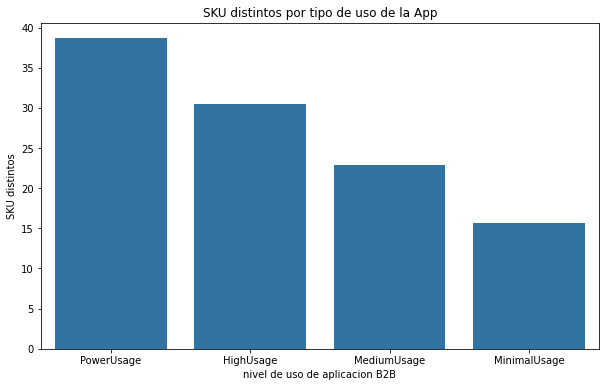

In [38]:
uso_app_SKU_distintos = atributos[['BussinessSegment', 'SkuDistintosToTales']].groupby(['BussinessSegment']).mean().reset_index().sort_values(by='SkuDistintosToTales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='BussinessSegment', y='SkuDistintosToTales', data=uso_app_SKU_distintos)
plt.xlabel('nivel de uso de aplicacion B2B')
plt.ylabel('SKU distintos')
plt.title('SKU distintos por tipo de uso de la App')
plt.show()

Que volumen total compraron los clientes agrupados por nivel de uso de la app?

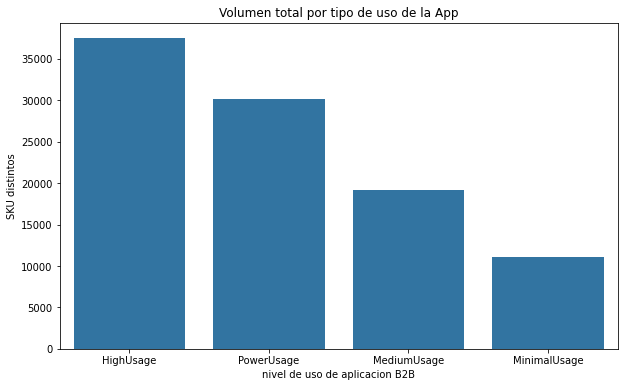

In [39]:
uso_app_SKU_distintos_vol = atributos[['BussinessSegment', 'totalVolumen']].groupby(['BussinessSegment']).sum().reset_index().sort_values(by='totalVolumen', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='BussinessSegment', y='totalVolumen', data=uso_app_SKU_distintos_vol)
plt.xlabel('nivel de uso de aplicacion B2B')
plt.ylabel('SKU distintos')
plt.title('Volumen total por tipo de uso de la App')
plt.show()


### Agrupaciones segun nivel socio economico del entorno en donde tiene el comercio el cliente:

In [40]:
atributos_nse = atributos[['nse', 'totalVolumen']]
total_registros = len(atributos_nse)

registros_S_D = len(atributos_nse.loc[atributos_nse.nse=='S/D']) #1023

print('registros sin informacion de nivel socioeconomico:', registros_S_D,',', registros_S_D/total_registros*100,  '%')



registros sin informacion de nivel socioeconomico: 1023 , 23.25 %


El 23 % de los registros no tiene informacion del nivel socio economico del cliente

Porcentaje de venta del volumen total segun nivel socio economico (nse)

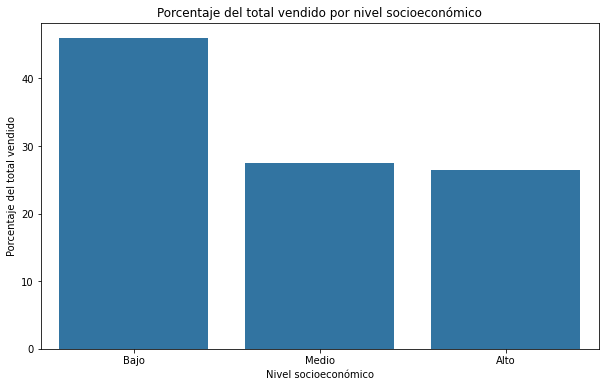

In [41]:

atributos_nse = atributos_nse.loc[atributos_nse.nse!='S/D']
nse_volumen_med_compra = atributos_nse.groupby(['nse']).mean().reset_index().sort_values(by='totalVolumen', ascending=False)



# Calcular el total vendido en todo el conjunto de datos
total_vendido = nse_volumen_med_compra['totalVolumen'].sum()




nse_volumen_med_compra_porcentaje = nse_volumen_med_compra
nse_volumen_med_compra_porcentaje['totalVolumen'] = nse_volumen_med_compra_porcentaje['totalVolumen']/total_vendido*100

plt.figure(figsize=(10, 6))
sns.barplot(x='nse', y='totalVolumen', data=nse_volumen_med_compra_porcentaje)
plt.xlabel('Nivel socioeconómico')
plt.ylabel('Porcentaje del total vendido')
plt.title('Porcentaje del total vendido por nivel socioeconómico')
plt.show()


Clasificacion de clientes segun nse. Numero de clientes por nse 

In [42]:
n_clientes = len(atributos_nse)
clientes_por_nse = atributos_nse['nse'].value_counts().reset_index()
clientes_por_nse['count'] = clientes_por_nse['count'].astype(float)
clientes_por_nse['count'] = clientes_por_nse['count']/n_clientes*100
clientes_por_nse


,nse,count
0,Medio,71.957359
1,Bajo,26.029020
2,Alto,2.013622


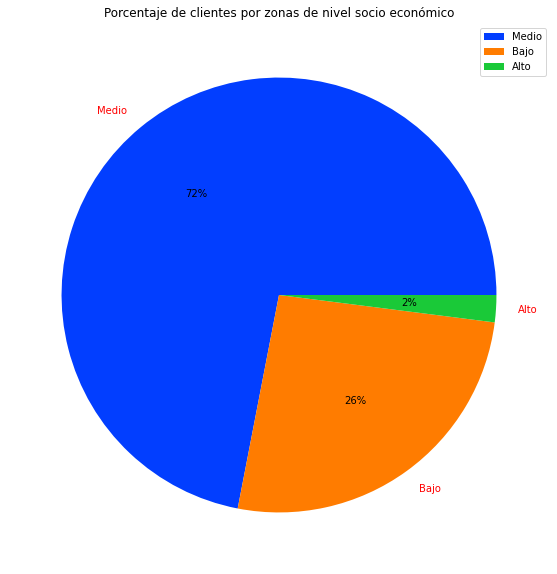

In [43]:
data = clientes_por_nse['count']
labels = clientes_por_nse['nse']
colors = sns.color_palette('bright')
plt.figure(figsize=(10, 10))

pie = plt.pie(data, labels=labels, colors=colors, autopct='%0.0f%%')
#plt.gca().set_facecolor('black')  # Establecer el fondo negro

# Cambiar el color de las etiquetas a blanco
for label in pie[1]:
    label.set_color('red')
plt.legend()
plt.title("Porcentaje de clientes por zonas de nivel socio económico")
plt.show()

Cuantos SKUs distintos compran los clientes separados por nse?

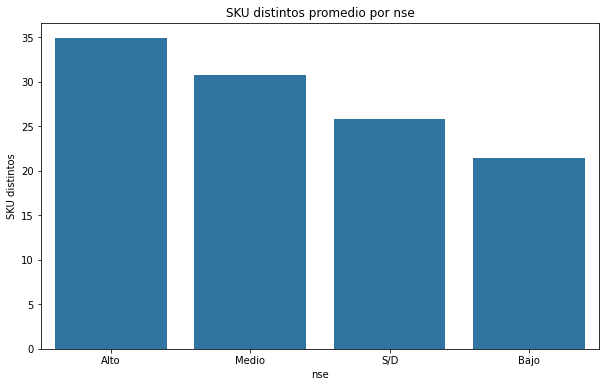

In [44]:
#cantidad de productos distintos por nse

skuS_x_nse =  atributos[['nse', 'SkuDistintosToTales']].groupby(['nse']).mean().reset_index().sort_values(by='SkuDistintosToTales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='nse', y='SkuDistintosToTales', data=skuS_x_nse)
plt.xlabel('nse')
plt.ylabel('SKU distintos')
plt.title('SKU distintos promedio por nse')
plt.show()


Puede verse que a pesar de que el volumen de venta para nse Alto no es el mayor, este segmento solicita mayor variedad de skus

### SKUs mas vendidos

Distribucion de ventas por sku.

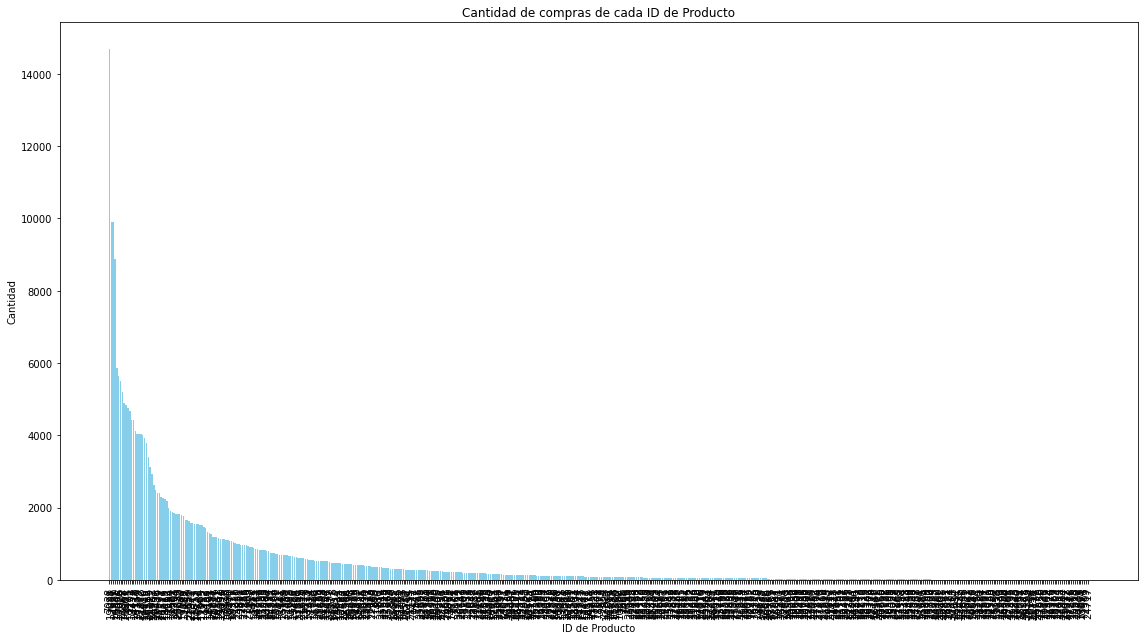

In [45]:


# Obtener la frecuencia de cada SKU_ID (ID de producto)
frecuencia_productos = transacciones['SKU_ID'].astype(str).value_counts()


# Crear un DataFrame con los resultados y ordenarlo por la frecuencia de manera descendente
resultados = pd.DataFrame({'SKU_ID': frecuencia_productos.index, 
                           'Cantidad': frecuencia_productos.values,
                           })
resultados = resultados.sort_values(by='Cantidad', ascending=False)

# Graficar la cantidad de veces que aparece cada ID de producto
plt.figure(figsize=(16, 9))
plt.bar(resultados['SKU_ID'], resultados['Cantidad'], color='skyblue')
plt.xlabel('ID de Producto')
plt.ylabel('Cantidad')
plt.title('Cantidad de compras de cada ID de Producto')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

La conclusion que se puede sacar de este gráfico es que pocos productos concentran la mayoria de las ventas. Sin analizar que productos sean.


In [46]:
resultados['Porcentaje_total'] = resultados['Cantidad']/sum(resultados['Cantidad'])*100
resultados['personaje_cumsum'] = resultados['Porcentaje_total'].cumsum()
parett = len(resultados.loc[resultados['personaje_cumsum'] <= 80])

print("IDs de Producto dentro del 80%:")
print(parett)
print('considerando que la cantidad de skus distintos vendidos son :')
print(len(resultados))
print('representan el ')
print(parett/len(resultados)*100, '%')

IDs de Producto dentro del 80%:
93
considerando que la cantidad de skus distintos vendidos son :
530
representan el 
17.547169811320753 %


Mas precisamente, el 80 % de las ventas, se concentran en el 18 % de los productos.

# 3 Realización del modelo 1:

Mediante este modelo se busca retornar un listado por cliente de los productos que sea mas probable que compre. 

El modelo que se implementará, consiste en agrupar (10 clusters) segun parecidos utilizando AgglomerativeClustering de scikit-learn. Luego se realiza un listado top 10 de los productos mas consumidos por cada grupo. El listado para cada cliente de los productos serán justamente estos 10 productos mas consumidos del grupo al cual pertenece.

Para facilitar la realizacion del modelo, iré eliminando algunos registros que no contienen toda la informacion _en principio_ necesaria. Ademas eliminaré algunos registros que pertenecen a grupos no tan numerosos o significativos. Esto probocara una perdida de registros (se vera al final), de un 20 % aproximadamente. Es decir, podré anticiparle al 80 % de los clientes que tipo de productos podrían interesarle.

In [47]:
#eliminacion de nan y S/D de los registros:
# Filtrar los registros que no contienen 'S/D' en la columna 'concentracion'
atributos1 = atributos[atributos['concentracion'] != 'S/D']

# Filtrar los registros que no contienen 'S/D' en la columna 'nse'
atributos1 = atributos1[atributos1['nse'] != 'S/D']

# Filtrar los registros que no contienen NaN en la columna 'segmentoUnico'
atributos1 = atributos1[~atributos1['segmentoUnico'].isna()]

# Filtrar los registros que no contienen NaN en la columna 'canal'
atributos1 = atributos1[~atributos1['canal'].isna()]

# Mostrar la información del DataFrame resultante
atributos1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3325 entries, 0 to 4397
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   POC                          3325 non-null   int64  
 1   BussinessSegment             3325 non-null   object 
 2   totalVolumen                 3325 non-null   float64
 3   SkuDistintosPromediosXOrden  3325 non-null   float64
 4   SkuDistintosToTales          3325 non-null   int64  
 5   concentracion                3325 non-null   object 
 6   nse                          3325 non-null   object 
 7   segmentoUnico                3325 non-null   object 
 8   canal                        3325 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 259.8+ KB


In [48]:
#Verificacion de que registros quedan:

print(atributos1.BussinessSegment.unique())
print(atributos1.concentracion.unique())
print(atributos1.nse.unique())
print(atributos1.segmentoUnico.unique())
print(atributos1.canal.unique())

['HighUsage' 'PowerUsage' 'MinimalUsage' 'MediumUsage']
['Medio' 'Alto' 'Bajo']
['Bajo' 'Medio' 'Alto']
['4.Activos' '1.Inactivos' '2.Masivos' '5.Select' '3.Potenciales']
['Kioscos/Maxikioscos' 'Tradicional' 'COMIDA' 'Autoservicio' 'BEBIDA'
 'Mayorista' 'OTROS REF' 'Bar/Restaurant' 'ENTRETENIMIENTO']


In [49]:
print('cantidad de registros perdidos: ',len(atributos)- len(atributos1), 'representa el ', (len(atributos)- len(atributos1))/len(atributos)*100, '%')

cantidad de registros perdidos:  1075 representa el  24.431818181818183 %


Todas las variables son numéricas o categoricas ordinales. Excepto canal de ventas. No hice un analisis detallado de caracteristicas, pero en principio uno podria pensar que esta caracteristica del cliente podria aportar informacion de que producto puede consumir (estimo que un autoservicio podria vender mas de un producto de un tipo que un negocio del tipo 'comida). de modo que aplicaré para esta caracteristica un encoding. Si son muchos registros diferentes, agregaria muchas columnas al dataframe, por lo que busco tomar las que sean mas representativas.

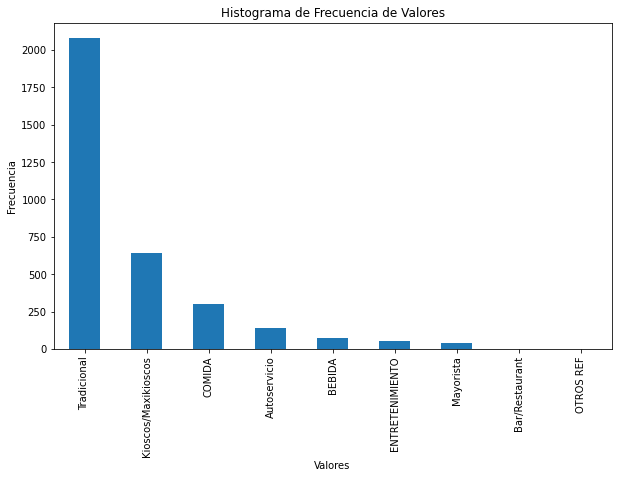

In [50]:
rep = atributos1['canal'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
rep.plot(kind='bar')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencia de Valores')
plt.show()

In [51]:
rep

canal
Tradicional            2078
Kioscos/Maxikioscos     642
COMIDA                  300
Autoservicio            139
BEBIDA                   72
ENTRETENIMIENTO          54
Mayorista                37
Bar/Restaurant            2
OTROS REF                 1
Name: count, dtype: int64

In [52]:
canal = atributos1['canal'].value_counts().reset_index()
canal.columns = ['valor', 'frecuencia']
canal['porcentaje'] = canal['frecuencia']/canal.frecuencia.sum()*100
canal['sumaacum'] = canal['porcentaje'].cumsum()
canal

,valor,frecuencia,porcentaje,sumaacum
0,Tradicional,2078,62.496241,62.496241
1,Kioscos/Maxikioscos,642,19.308271,81.804511
2,COMIDA,300,9.022556,90.827068
3,Autoservicio,139,4.180451,95.007519
4,BEBIDA,72,2.165414,97.172932
5,ENTRETENIMIENTO,54,1.624060,98.796992
6,Mayorista,37,1.112782,99.909774
7,Bar/Restaurant,2,0.060150,99.969925
8,OTROS REF,1,0.030075,100.000000


Mas del 95 % de los clientes estan clasificados como Tradicional, Kioscos/Maxikioscos, COMIDA, Autoservicio.

In [53]:
canal_vol = atributos1[['totalVolumen', 'canal']].groupby(['canal']).sum().reset_index().sort_values(by='totalVolumen', ascending=False)
canal_vol_tot = canal_vol['totalVolumen'].sum()

canal_vol['porcentaje'] = canal_vol['totalVolumen']/canal_vol_tot*100
canal_vol['sumaacum'] = canal_vol['porcentaje'].cumsum()

canal_vol

,canal,totalVolumen,porcentaje,sumaacum
8,Tradicional,29508.86176,42.658257,42.658257
6,Mayorista,13292.22360,19.215349,61.873606
0,Autoservicio,8655.07097,12.511843,74.385449
5,Kioscos/Maxikioscos,8364.59275,12.091925,86.477374
3,COMIDA,5870.09802,8.485863,94.963237
1,BEBIDA,2378.09818,3.437799,98.401036
4,ENTRETENIMIENTO,1040.08887,1.503561,99.904597
2,Bar/Restaurant,65.27562,0.094363,99.998960
7,OTROS REF,0.71946,0.001040,100.000000


Si bien mayoristas son solo el 1% de los clientes, tienen casi el 19 % del volumen total de ventas. 

Pero para poder anticipar que querran la mayoria de los clientes, el volumen total de compra no importa tanto. Deberia hacerse un modelo particular para este tipo de cliente ya que concentra en muy pocos clientes, mucho volumen de venta.

In [54]:

#Transformacion de variables categoricas ordinales:

mapeo = {
    'PowerUsage': 4,
    'HighUsage': 3,
    'MediumUsage': 2,
    'MinimalUsage': 1
}


atributos1['BussinessSegment'] = atributos1['BussinessSegment'].replace(mapeo)

atributos1.BussinessSegment.unique()


array([3, 4, 1, 2], dtype=int64)

In [55]:
atributos1.nse.unique()
mapeo = {
    'Alto': 3,
    'Medio': 2,
    'Bajo': 1,
    
}


atributos1['nse'] = atributos1['nse'].replace(mapeo)

atributos1.nse.unique()

array([1, 2, 3], dtype=int64)

In [56]:
#atributos1.segmentoUnico.unique()
mapeo = {
    '5.Select': 5,
    '4.Activos': 4,
    '3.Potenciales': 3,
    '2.Masivos':2,
    '1.Inactivos':1
}

atributos1['segmentoUnico'] = atributos1['segmentoUnico'].replace(mapeo)
atributos1.segmentoUnico.unique()

array([4, 1, 2, 5, 3], dtype=int64)

In [57]:
#de la columna canal, me quedare solo con los registros: 'Tradicional', 'Kioscos/Maxikioscos', 'COMIDA', 'Autoservicio'.
valores_deseados = ['Tradicional', 'Kioscos/Maxikioscos', 'COMIDA', 'Autoservicio']
atributos1= atributos1[atributos1['canal'].isin(valores_deseados)]

# Aplicar one-hot encoding con dtype=int
atributos1 = pd.get_dummies(atributos1, columns=['canal'], dtype=int)
atributos1


atributos1


,POC,BussinessSegment,totalVolumen,SkuDistintosPromediosXOrden,SkuDistintosToTales,concentracion,nse,segmentoUnico,canal_Autoservicio,canal_COMIDA,canal_Kioscos/Maxikioscos,canal_Tradicional
0,175519,3,5.18752,4.1000,16,Medio,1,4,0,0,1,0
1,28533,3,4.76866,3.9211,34,Alto,2,4,0,0,0,1
2,32182,4,5.97930,6.7500,34,Alto,2,4,0,0,0,1
3,327976,1,6.02852,3.5833,14,Alto,2,4,0,1,0,0
6,357408,4,1.00784,3.1250,12,Alto,1,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4390,448681,3,4.99724,8.0000,30,Alto,2,4,0,0,0,1
4391,448906,2,38.02928,5.6000,24,Alto,2,3,0,1,0,0
4392,450844,3,10.01210,7.5000,32,Medio,1,2,0,0,0,1
4395,456768,4,663.93040,2.4831,26,Medio,2,5,0,0,0,1


El algoritmo que se aplicará para clusterizar, es sensible a los valores de los registros (utiliza la distancia euclideana), para evitar distorsiones en el analisis, aplico normalización para todas las variables de modo que todas variarán entre 0 y 1.

In [58]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas que deseas normalizar
columnas_a_normalizar = ['BussinessSegment', 'totalVolumen', 'SkuDistintosPromediosXOrden', 'SkuDistintosToTales', 'concentracion',	'nse', 'segmentoUnico']

scaler = MinMaxScaler()

# Normalizar las columnas seleccionadas
atributos_norm = atributos1.copy()
atributos_norm[columnas_a_normalizar] = scaler.fit_transform(atributos_norm[columnas_a_normalizar])

atributos_norm


ValueError: could not convert string to float: 'Medio'

Como tengo muchas variables, para mejorar la presicion del algoritmo, aplicaré reducción de dimensionalidad.

In [ ]:
#para estas variables, aplico reduccion de dimensionalidad:

from sklearn.decomposition import PCA

# Seleccionar las características para el análisis
caracteristicas = ['BussinessSegment', 'totalVolumen', 'SkuDistintosPromediosXOrden', 'SkuDistintosToTales', 'concentracion', 'nse', 'segmentoUnico', 'canal_Autoservicio', 'canal_COMIDA', 'canal_Kioscos/Maxikioscos', 'canal_Tradicional']

# Separar las características de la variable objetivo (POC)
X = atributos_norm[caracteristicas]

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=5)  # Especifica el número de componentes deseados
X_pca = pca.fit_transform(X)

# Ahora X_pca contiene las características reducidas en dimensiones


In [ ]:
# finalmente aplico el algoritmo de clustering:
from sklearn.cluster import AgglomerativeClustering

# Especifica el número de clústeres deseados
num_clusters = 10

# Aplica clustering jerárquico
clustering = AgglomerativeClustering(n_clusters=num_clusters).fit(X_pca)

# Obtén las etiquetas de los clústeres asignados a cada cliente
labels = clustering.labels_
labels

array([0, 7, 7, ..., 3, 6, 0], dtype=int64)

En este dataframe puede verse el listado de clientes y a que grupo pertenece.

In [61]:
clusters = pd.DataFrame({'POC': atributos1['POC'], 'Grupo': labels})
clusters.rename(columns={'POC':'ACCOUNT_ID'}, inplace=True)
clusters

,ACCOUNT_ID,Grupo
0,175519,Medio
1,28533,Bajo
2,32182,Alto
3,327976,NaN
6,357408,NaN
...,...,...
4390,448681,NaN
4391,448906,NaN
4392,450844,NaN
4395,456768,NaN


Ahora uno el dataframe anterior al de transacciones para encontrar el top 10 de productos por grupo.

In [62]:
#mergear con el dataframe transacciones

transacluster = transacciones.merge(clusters,  how='left', on='ACCOUNT_ID') #280828
transacluster.dropna(subset=['Grupo'], inplace=True) #206189
transacluster.Grupo = transacluster.Grupo.astype(int)
transacluster

ValueError: invalid literal for int() with base 10: 'Alto'

In [63]:
# Agrupar por 'Grupo' y contar la frecuencia de cada SKU_ID en cada grupo
top_productos_por_grupo = transacluster.groupby('Grupo')['SKU_ID'].value_counts().reset_index(name='count')

# Obtener el top 10 de productos más solicitados por cada grupo
top_10_por_grupo = top_productos_por_grupo.groupby('Grupo').head(10)

# Verificar el resultado
top_10_por_grupo.head(30)

,Grupo,SKU_ID,count
0,Alto,77846,3
1,Alto,24932,2
2,Alto,16936,2
3,Alto,7484,2
4,Alto,7475,2
5,Alto,19337,2
6,Alto,24880,2
7,Alto,24116,2
8,Alto,19399,2
9,Alto,24881,2


In [60]:
df = top_10_por_grupo
# Agrupar por Grupo y obtener los 10 SKU más frecuentes en una lista
df_top_10 = df.groupby('Grupo')['SKU_ID'].apply(lambda x: x.head(10).tolist()).reset_index()

# Renombrar la columna
df_top_10.columns = ['Grupo', 'Recomendaciones']

df_top_10

NameError: name 'top_10_por_grupo' is not defined

## 4 Dataframe final (output):

Finalmente.....

In [59]:
recomendaciones_cliente = clusters.merge(df_top_10, how='left', on='Grupo')
recomendaciones_cliente

NameError: name 'clusters' is not defined

En la columna Recomendaciones, hay una lista en de los 10 productos que le aparecerían al cliente en pantalla para que compre.

En esta columna hay recomendaciones para 3159 clientes y no para todos los 4400 clientes. Esto es por la eliminación de registros con valores faltantes y con valores pocos comunes. Implica una reduccion del 28 % aproximadamente.


## 5 Realización del modelo 2

Despues de pasado un tiempo, pude darme cuenta que hay algunos puntos por mejorar del modelo. Esta es la segunda edicion mejorada.

In [ ]:
canal = atributos1['canal'].value_counts().reset_index()
canal.columns = ['valor', 'frecuencia']
canal['porcentaje'] = canal['frecuencia']/canal.frecuencia.sum()*100
canal['sumaacum'] = canal['porcentaje'].cumsum()
canal

NameError: name 'atributos1' is not defined

## 6 Para mejorar:


* **Metricas** :por cuestion de tiempo no se desarrollaron pruebas del algoritmo. Para hacerlas, en realidad debería haber seleccionado un conjunto de registros de entrenamiento y otro de prueba. el entrenamiento deberia haberlo hecho con registros de un período de tiempo (por ejemplo primeros 3 meses) y la prueba en el ultimo mes.

* **Clientes que quedaron afuera de este modelo**: quedan casi 30 % de clientes sin predecir su compra, lo que hubiera hecho es aplicar otro tipo de algoritmo (probablemente mas simple) para poder prededecir las intensiones de los clientes.

* **Robustez y exactitud del algoritmo**: hubiera intentado realizar mas algoritmos y hacer un boost para mejorar la predicción.